**HACK THE MARKET.**

A dataset of historical information on the EURO-LIBRA pair is provided.
A currency pair is the dyadic quotation of the relative value of a currency unit against the unit of another currency in the foreign exchange market.

For example: EURGBP = 0,9 means that 1 EURO has a value of 0,9 GBP.

Historical prices in the dataset goes from January 3rd 2000 to Octobre 29th 2019

In [1]:
#Cargemos las librerias necesarias
import numpy as np # Algebra lineal
import pandas as pd # Manejo de datos
import matplotlib.pyplot as plt
import seaborn as sns
import math
import csv
from datetime import datetime
import locale
from pandas.plotting import scatter_matrix

Cargaremos las bases de datos 

In [2]:
data = pd.read_csv('data_individual_challenge.csv', sep = ';')

In [3]:
data.info()
data.head(42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1035 non-null   object 
 1   Open        1035 non-null   float64
 2   High        1035 non-null   float64
 3   Low         1035 non-null   float64
 4   Close       1035 non-null   float64
 5   rsi         1021 non-null   float64
 6   ema_fast    1022 non-null   float64
 7   ema_slow    994 non-null    float64
 8   volatility  1021 non-null   float64
dtypes: float64(8), object(1)
memory usage: 72.9+ KB


,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
0,2000-01-03,0.6281,633.00000,0.6235,0.6272,NaN,NaN,NaN,NaN
1,2000-01-10,0.6271,629.00000,0.6181,0.6197,NaN,NaN,NaN,NaN
2,2000-01-17,0.6200,0.62250,0.6072,609.0000,NaN,NaN,NaN,NaN
3,2000-01-24,0.6091,0.61271,599.0000,0.6027,NaN,NaN,NaN,NaN
4,2000-01-31,0.6021,0.62670,598.0000,0.6158,NaN,NaN,NaN,NaN
5,2000-02-07,0.6166,0.62090,0.6102,0.6192,NaN,NaN,NaN,NaN
6,2000-02-14,0.6192,0.62320,0.6117,0.6157,NaN,NaN,NaN,NaN
7,2000-02-21,0.6161,0.62650,0.6100,0.6114,NaN,NaN,NaN,NaN
8,2000-02-28,0.6117,0.61740,0.5929,606.0000,NaN,NaN,NaN,NaN
9,2000-03-06,0.6059,0.61320,602.0000,0.6102,NaN,NaN,NaN,NaN


In [4]:
#Eliminamos los NaN
for i in range(0,14):
    data['ema_fast'][i]=0

for i in range(0,42):
    data['ema_slow'][i]= 0

for i in range(0,14):
    data['rsi'][i]= 0

for i in range(0,14):
    data['volatility'][i]= 0

/var/folders/c8/jm5bxz7570zfzhpvhz0bdcc80000gn/T/ipykernel_61936/3434235392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ema_fast'][i]=0
/var/folders/c8/jm5bxz7570zfzhpvhz0bdcc80000gn/T/ipykernel_61936/3434235392.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ema_slow'][i]= 0
/var/folders/c8/jm5bxz7570zfzhpvhz0bdcc80000gn/T/ipykernel_61936/3434235392.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rsi'

In [5]:
#Observamos que se hayan eliminado
data.head(43)

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
0,2000-01-03,0.6281,633.00000,0.6235,0.6272,0.000000,0.000000,0.000000,0.000000
1,2000-01-10,0.6271,629.00000,0.6181,0.6197,0.000000,0.000000,0.000000,0.000000
2,2000-01-17,0.6200,0.62250,0.6072,609.0000,0.000000,0.000000,0.000000,0.000000
3,2000-01-24,0.6091,0.61271,599.0000,0.6027,0.000000,0.000000,0.000000,0.000000
4,2000-01-31,0.6021,0.62670,598.0000,0.6158,0.000000,0.000000,0.000000,0.000000
5,2000-02-07,0.6166,0.62090,0.6102,0.6192,0.000000,0.000000,0.000000,0.000000
6,2000-02-14,0.6192,0.62320,0.6117,0.6157,0.000000,0.000000,0.000000,0.000000
7,2000-02-21,0.6161,0.62650,0.6100,0.6114,0.000000,0.000000,0.000000,0.000000
8,2000-02-28,0.6117,0.61740,0.5929,606.0000,0.000000,0.000000,0.000000,0.000000
9,2000-03-06,0.6059,0.61320,602.0000,0.6102,0.000000,0.000000,0.000000,0.000000


**Análisis de datos**

Vamos a extraer información sobre los datos.

In [6]:
data.shape

(1035, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1035 non-null   object 
 1   Open        1035 non-null   float64
 2   High        1035 non-null   float64
 3   Low         1035 non-null   float64
 4   Close       1035 non-null   float64
 5   rsi         1035 non-null   float64
 6   ema_fast    1035 non-null   float64
 7   ema_slow    1035 non-null   float64
 8   volatility  1035 non-null   float64
dtypes: float64(8), object(1)
memory usage: 72.9+ KB


In [8]:
#Convertimos a formato datetime la columna Date
data['Date']= pd.to_datetime(data['Date'],infer_datetime_format=True)

In [9]:
#Una ddescripción de los datos
data.describe()


,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,54.802227,62.775776,76.327544,59.336179,50.571048,0.756811,0.736582,2.125869
std,193.425540,209.802582,226.985729,204.314143,11.794584,0.131094,0.176998,1.490975
min,0.578300,0.587600,0.006600,0.578400,0.000000,0.000000,0.000000,0.000000
25%,0.683300,0.688375,0.678200,0.682750,43.995432,0.679304,0.679985,1.449570
50%,0.800900,0.806430,0.798400,0.798830,50.528247,0.786046,0.770407,1.825117
75%,0.874650,0.881685,0.869890,0.874000,57.490655,0.858519,0.854937,2.229786
max,892.000000,934.000000,899.000000,921.000000,79.522395,0.903959,0.889572,17.421381


In [10]:
data['year']= pd.DatetimeIndex(data['Date']).year
data['month']= pd.DatetimeIndex(data['Date']).month

In [11]:
dataset = data[['Date', 'Open', 'High', 'Low', 'Close', 'rsi', 'ema_fast', 'ema_slow',
       'volatility','year']]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1035 non-null   datetime64[ns]
 1   Open        1035 non-null   float64       
 2   High        1035 non-null   float64       
 3   Low         1035 non-null   float64       
 4   Close       1035 non-null   float64       
 5   rsi         1035 non-null   float64       
 6   ema_fast    1035 non-null   float64       
 7   ema_slow    1035 non-null   float64       
 8   volatility  1035 non-null   float64       
 9   year        1035 non-null   int64         
 10  month       1035 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 89.1 KB


In [13]:
data.groupby('year').size()

year
2000    52
2001    53
2002    52
2003    52
2004    52
2005    52
2006    52
2007    53
2008    52
2009    52
2010    52
2011    52
2012    53
2013    52
2014    52
2015    52
2016    52
2017    52
2018    53
2019    43
dtype: int64

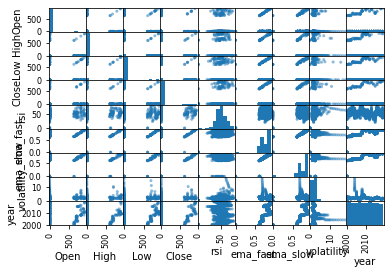

In [14]:
scatter_matrix(dataset)
plt.show()

/var/folders/c8/jm5bxz7570zfzhpvhz0bdcc80000gn/T/ipykernel_61936/2678997174.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('year')['Open', 'Close'].mean().plot(kind = 'bar',figsize = (15,20))
/var/folders/c8/jm5bxz7570zfzhpvhz0bdcc80000gn/T/ipykernel_61936/2678997174.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('year')['High', 'Low'].mean().plot(kind = 'bar',figsize = (15,20))


<AxesSubplot:xlabel='year'>

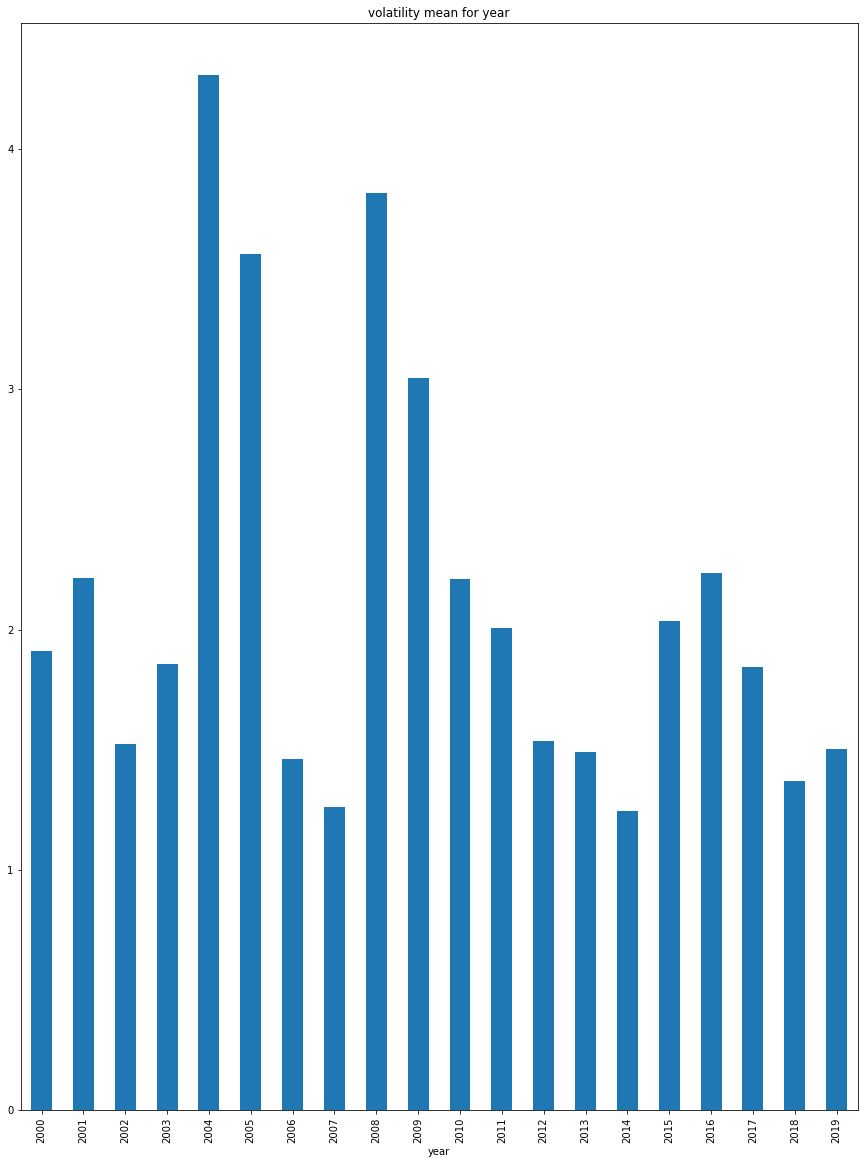

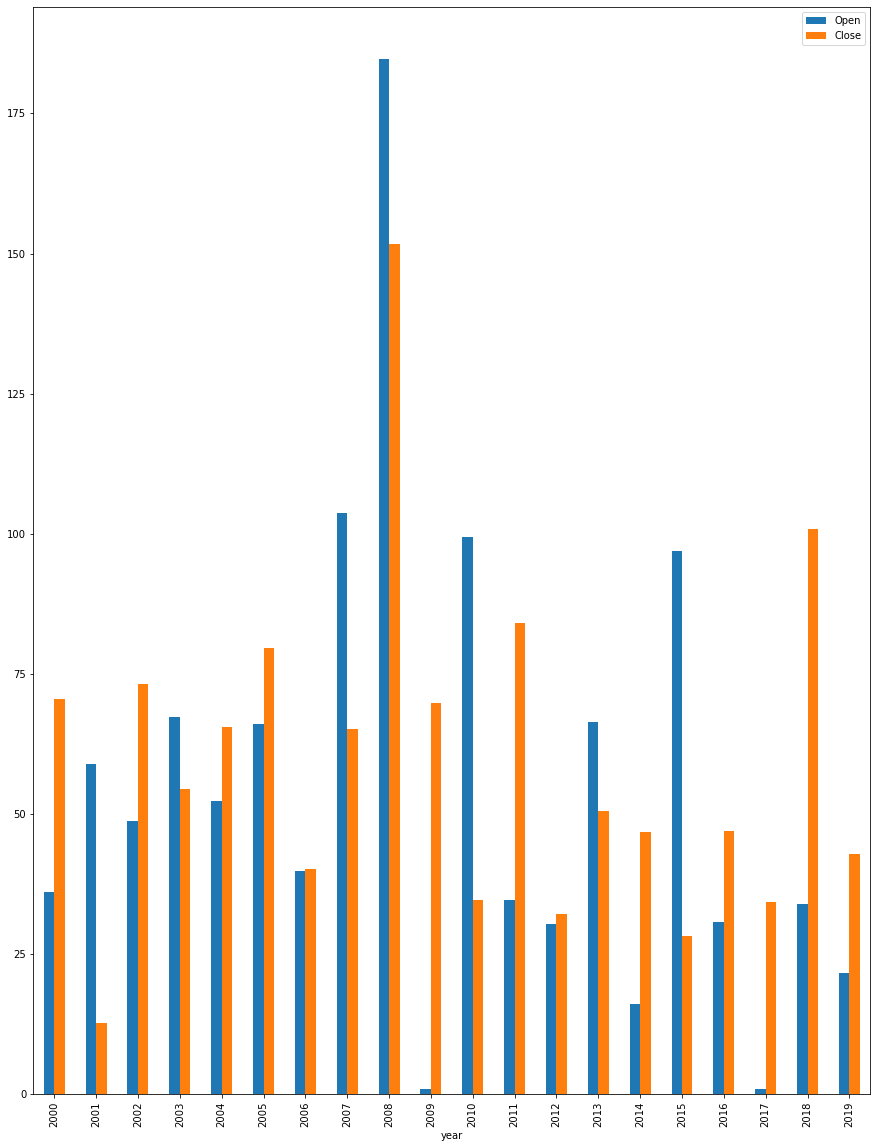

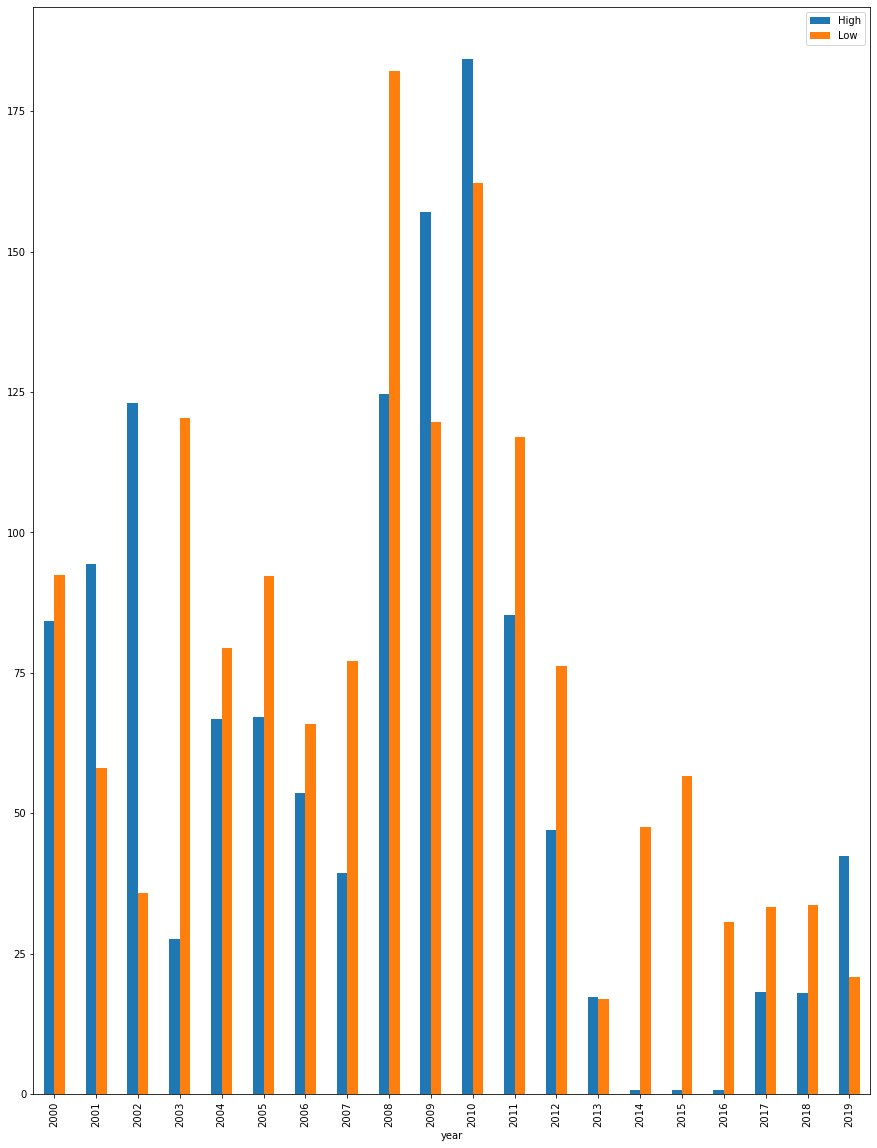

In [15]:
plt.rcParams["figure.figsize"] = (8, 6)
data.groupby(['year'])['volatility'].mean().plot(kind = 'bar',stacked=True,figsize = (15,20), title = 'volatility mean for year')
data.groupby('year')['Open', 'Close'].mean().plot(kind = 'bar',figsize = (15,20))
data.groupby('year')['High', 'Low'].mean().plot(kind = 'bar',figsize = (15,20))

<AxesSubplot:xlabel='year'>

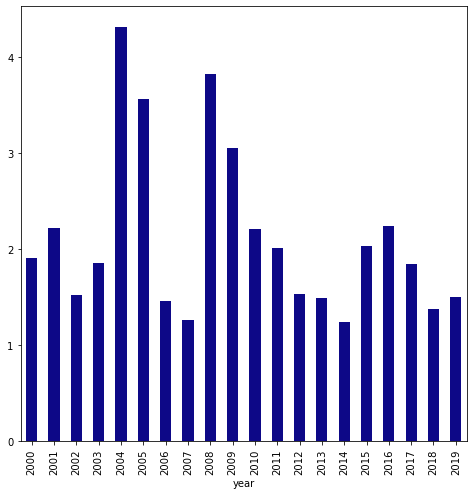

In [16]:
data.groupby('year')['volatility'].mean().plot(kind = 'bar',figsize = (8,8),cmap = 'plasma' )

<AxesSubplot:title={'center':'rsi per year'}, xlabel='year'>

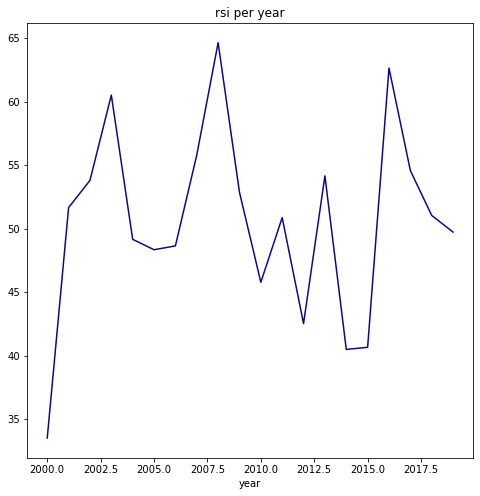

In [25]:
data.groupby('year')['rsi'].mean().plot(kind = 'line',figsize = (8,8),cmap = 'plasma' , title = 'rsi per year')

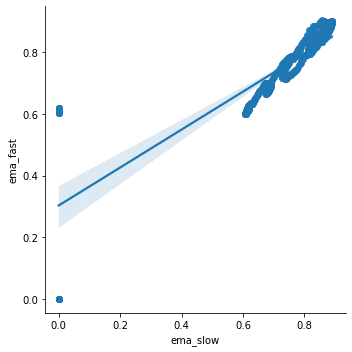

In [18]:
sns.lmplot(x='ema_slow', y='ema_fast', data= data)

In [19]:
## Analisis de regresion from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [20]:
label_volatility = LabelEncoder()
data['volatility'] = label_volatility.fit_transform(data['volatility'])

In [21]:
training_set_regresor=data.drop(['Date','volatility', 'year', 'month'],axis=1)
print(training_set_regresor)

         Open       High        Low      Close        rsi  ema_fast  ema_slow
0     0.62810  633.00000    0.62350    0.62720   0.000000  0.000000  0.000000
1     0.62710  629.00000    0.61810    0.61970   0.000000  0.000000  0.000000
2     0.62000    0.62250    0.60720  609.00000   0.000000  0.000000  0.000000
3     0.60910    0.61271  599.00000    0.60270   0.000000  0.000000  0.000000
4     0.60210    0.62670  598.00000    0.61580   0.000000  0.000000  0.000000
...       ...        ...        ...        ...        ...       ...       ...
1030  0.89002    0.89365    0.88333    0.88779  47.151897  0.895761  0.889108
1031  0.89050    0.90183    0.86835    0.86835  37.551961  0.892106  0.888143
1032  0.87443    0.88081    0.85808    0.86451  35.993098  0.888426  0.887044
1033  0.86453    0.86687    0.85770    0.86380  35.698024  0.885143  0.885962
1034  0.86390    0.86520    0.85958    0.86280  35.259578  0.882164  0.884885

[1035 rows x 7 columns]


In [22]:
x_train,x_test,y_train,y_test=train_test_split(training_set_regresor,data['volatility'],test_size=0.30,random_state=100)
print(x_test)

         Open       High        Low       Close        rsi  ema_fast  ema_slow
826   0.71390    0.71963    0.70430    0.714235  42.737080  0.723431  0.732799
917   0.89374    0.90538    0.89235    0.902710  65.387667  0.880158  0.862507
213   0.68340    0.68860  681.00000    0.685600  43.562845  0.693196  0.691081
270   0.68780    0.69950  673.00000    0.698800  57.339613  0.692513  0.687887
1022  0.91415    0.93960    0.91320    0.921100  72.123370  0.895018  0.884720
...       ...        ...        ...         ...        ...       ...       ...
682   0.85350    0.87010    0.85290  869.000000  75.820378  0.826718  0.817782
985   0.88906    0.89248    0.88380    0.884800  49.452691  0.885399  0.884903
581   0.84372    0.85910    0.83830  856.000000  52.371556  0.849390  0.853074
206   0.70050    0.70740    0.69880    0.700800  53.244399  0.697942  0.690855
553   0.83140  836.00000    0.81810    0.822800  35.941055  0.839805  0.860573

[311 rows x 7 columns]


In [23]:
model_names=['KNearestNeighbors']

acc=[]
eval_acc={}
classification_model=KNeighborsClassifier()
classification_model.fit(x_train,y_train)
pred=classification_model.predict(x_test)
acc.append(accuracy_score(pred,y_test))
eval_acc={'Modelling Algorithm':model_names,'Accuracy':acc} 

In [24]:
eval_acc

{'Modelling Algorithm': ['KNearestNeighbors'],
 'Accuracy': [0.003215434083601286]}